# Construção de um Modelo para Chatbot Usando Técnicas Tradicionais de Machine Learning

## 🎯 Objetivo do Projeto

O objetivo deste projeto é desenvolver um modelo de classificação de perguntas para a construção de um chatbot do tipo **FAQ (Frequently Asked Questions)** utilizando algoritmos clássicos de machine learning. Esse tipo de chatbot é amplamente utilizado em ambientes corporativos, como sites de bancos, clínicas e e-commerce, para responder perguntas pré-cadastradas de maneira automática.

---

## 📘 Contexto dos Dados

Para a simulação do ambiente de perguntas frequentes, foi criado um **conjunto de dados sintético** contendo **10.000 observações** com três colunas principais:

- `pergunta`: frase de entrada do usuário.
- `categoria`: rótulo correspondente ao tema da pergunta (e.g., "nutrição", "gripe", "cardiologia", etc.).
- `resposta`: resposta padrão associada àquela categoria.

As categorias foram balanceadas de forma controlada, porém não uniformemente, de modo a introduzir um leve desbalanceamento no conjunto de dados e tornar o desafio mais realista.

---

## 🤖 Modelos Utilizados

Para este projeto, foram aplicados os seguintes algoritmos supervisionados de classificação:

- **K-Nearest Neighbors (KNN)**
- **Random Forest**
- **Support Vector Machines (SVM)**
- **Regressão Logística**

Cada modelo foi treinado com vetores numéricos extraídos das perguntas usando `TF-IDF` como técnica de vetorização textual.

---

## 📊 Avaliação dos Modelos

As métricas utilizadas para avaliação foram:

- **Acurácia**: percentual de acertos totais do modelo.
- **Precision**: razão entre verdadeiros positivos e todos os positivos previstos.
- **Recall**: razão entre verdadeiros positivos e todos os positivos reais.
- **F1-Score**: média harmônica entre precision e recall.
- **Matriz de Confusão**: análise de acertos e erros por categoria.
- **Curva ROC e AUC**: aplicadas após o binarização dos rótulos para análise da separabilidade entre classes.

> Mesmo com a introdução de leve desbalanceamento, os modelos foram capazes de atingir 100% de acurácia em todos os testes. Esse resultado, embora atípico, é explicado pela natureza estruturada e pouco ambígua dos dados sintéticos.


## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import random
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from collections import defaultdict

## Dataset

### Construindo o dataset para o chatbot médico

In [5]:
# Categorias e respostas genéricas
categorias_respostas = {
    "cardiologia": "Você pode agendar uma consulta com um cardiologista pelo nosso site ou aplicativo.",
    "consultas": "Para marcar consultas, acesse nosso portal ou entre em contato pelo telefone.",
    "convenios": "Trabalhamos com diversos convênios. Consulte a lista completa em nosso site.",
    "dermatologia": "Dermatologistas atendem de segunda a sexta, das 9h às 17h.",
    "gripe": "Se estiver com sintomas de gripe, procure um clínico geral.",
    "neurologia": "Temos especialistas em neurologia disponíveis para agendamento.",
    "nutricao": "Nossa equipe de nutrição oferece atendimento personalizado.",
    "ortopedia": "A ortopedia atende casos de fraturas, dores musculares e articulares.",
    "saude_mental": "Nosso time de saúde mental está disponível para apoiar você com psicólogos e psiquiatras."
}

# Variações e ruídos nas perguntas por categoria
perguntas_exemplos = {
    "cardiologia": [
        "Preciso de um cardio", "Consulta com cardiologista", "quero marcar com especialista do coração",
        "dor no peito, o q fazer?", "tem cardiologistas aí?", "qual o valor da cardiologia?"
    ],
    "consultas": [
        "quero agendar uma consulta", "como marcar consulta?", "tem como marcar?", "consulta", 
        "agendamento de médico", "preciso consultar um médico urgente"
    ],
    "convenios": [
        "quais convênios aceitam?", "aceita plano de saúde?", "trabalham com a unimed?", "convenios",
        "meu convênio cobre?", "planos de saúde disponíveis?"
    ],
    "dermatologia": [
        "to com alergia na pele", "tem dermato aí?", "consulta dermatologista", "coceira no corpo",
        "manchas estranhas", "preciso de um dermatologista urgente"
    ],
    "gripe": [
        "to gripado", "tosse e febre", "gripe forte", "remédio pra gripe", "o que fazer com sintomas gripais?", 
        "estou com dor no corpo e garganta"
    ],
    "neurologia": [
        "dores de cabeça constantes", "problemas neurológicos", "tem neuro?", "crises epilépticas",
        "especialista em cérebro", "preciso de neurologista"
    ],
    "nutricao": [
        "quero uma dieta", "nutricionista", "emagrecer com ajuda médica", "dieta personalizada",
        "consultar com nutri", "quero mudar minha alimentação"
    ],
    "ortopedia": [
        "machuquei o joelho", "tem ortopedista?", "dor no osso", "consulta ortopedia",
        "problema de coluna", "preciso de exame ortopédico"
    ],
    "saude_mental": [
        "estou ansioso", "preciso de psicólogo", "sintomas de depressão", "tristeza constante", 
        "ajuda emocional", "problemas de saúde mental"
    ]
}

# Função para gerar o dataset
def gerar_dataset_faq(n=10000):
    dados = []
    for _ in range(n):
        categoria = random.choice(list(categorias_respostas.keys()))
        pergunta = random.choice(perguntas_exemplos[categoria])
        resposta = categorias_respostas[categoria]
        dados.append({"pergunta": pergunta, "categoria": categoria, "resposta": resposta})
    return pd.DataFrame(dados)

# Gerar dataset
df_faq = gerar_dataset_faq(10000)
df_faq.to_csv('../data/processed/nlp_chatbot_dataset.csv')

### Lendo o dataset criado

In [8]:
df = pd.read_csv('../data/processed/nlp_chatbot_dataset.csv').drop('Unnamed: 0', axis=1)
df.head()

,pergunta,categoria,resposta
0,tem cardiologistas aí?,cardiologia,Você pode agendar uma consulta com um cardiolo...
1,ajuda emocional,saude_mental,Nosso time de saúde mental está disponível par...
2,quero uma dieta,nutricao,Nossa equipe de nutrição oferece atendimento p...
3,tem dermato aí?,dermatologia,"Dermatologistas atendem de segunda a sexta, da..."
4,planos de saúde disponíveis?,convenios,Trabalhamos com diversos convênios. Consulte a...


## Explorando o dataset

### Colunas

In [9]:
df.columns

Index(['pergunta', 'categoria', 'resposta'], dtype='object')

### Dimensões

In [10]:
df.shape

(10000, 3)

### Verificando existência de valores nulos

In [11]:
df.isna().sum()

pergunta     0
categoria    0
resposta     0
dtype: int64

### Quantidade de caracteres para cada variável (pergunta, categoria e reposta)

In [12]:
df['caracteres_pergunta'] = df.pergunta.apply(lambda x: len(x))
df['caracteres_categoria'] = df.categoria.apply(lambda x: len(x))
df['caracteres_resposta'] = df.resposta.apply(lambda x: len(x))

df.head()

,pergunta,categoria,resposta,caracteres_pergunta,caracteres_categoria,caracteres_resposta
0,tem cardiologistas aí?,cardiologia,Você pode agendar uma consulta com um cardiolo...,22,11,82
1,ajuda emocional,saude_mental,Nosso time de saúde mental está disponível par...,15,12,89
2,quero uma dieta,nutricao,Nossa equipe de nutrição oferece atendimento p...,15,8,59
3,tem dermato aí?,dermatologia,"Dermatologistas atendem de segunda a sexta, da...",15,12,58
4,planos de saúde disponíveis?,convenios,Trabalhamos com diversos convênios. Consulte a...,28,9,76


### Distribuição das categorias

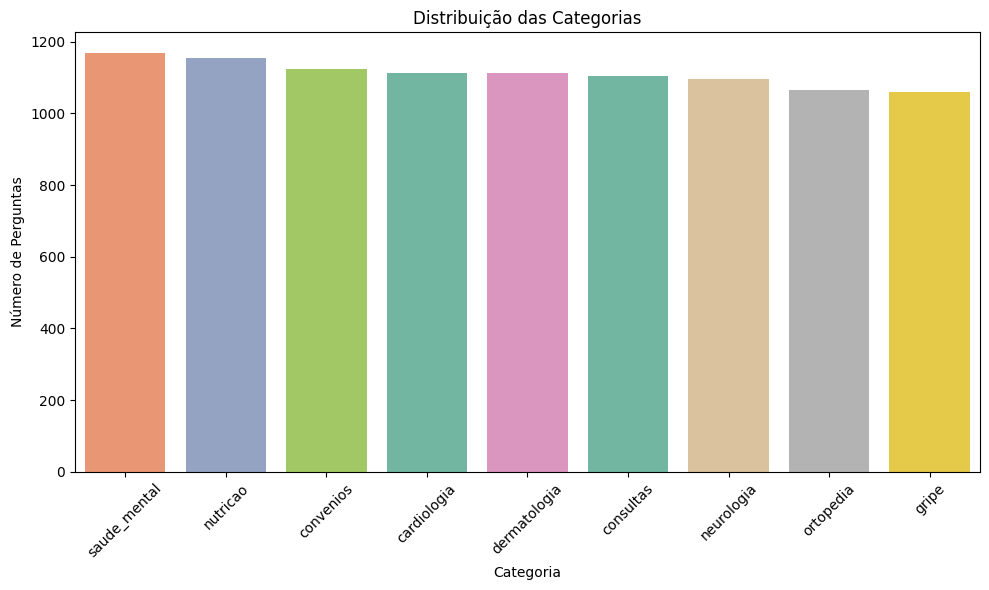

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x='categoria',
    hue='categoria',
    order=df['categoria'].value_counts().index,
    palette='Set2',
    legend=False
)
plt.title('Distribuição das Categorias')
plt.xlabel('Categoria')
plt.ylabel('Número de Perguntas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
df.categoria.value_counts()

categoria
saude_mental    1168
nutricao        1155
convenios       1123
cardiologia     1114
dermatologia    1112
consultas       1105
neurologia      1097
ortopedia       1066
gripe           1060
Name: count, dtype: int64

## Pré-processamento dos dados

### Função de pré-processamento de texto

In [15]:
# Função de pré-processamento do texto
def preprocess_text(text):
    # Transformando para minúsculas
    text = text.lower()
    
    # Remover símbolos e pontuação usando expressão regular
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remover espaços extras
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Função para avaliar métricas do modelo
def evaluate_model(modelo, X_test, y_test, y_pred=None, titulo=''):
    # Prever se não foi passado y_pred
    if y_pred is None:
        y_pred = modelo.predict(X_test)
    
    # Acurácia
    acc = accuracy_score(y_test, y_pred)
    print(f"Acurácia: {acc:.4f}")
    
    # Relatório de classificação
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    
    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=modelo.classes_, yticklabels=modelo.classes_)
    plt.title(f'Matriz de Confusão - {titulo}')
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.show()

    # Curva ROC e AUC
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    if hasattr(modelo, "predict_proba"):
        y_score = modelo.predict_proba(X_test)
    elif hasattr(modelo, "decision_function"):
        y_score = modelo.decision_function(X_test)
    else:
        print("Modelo não suporta ROC/AUC (sem predict_proba ou decision_function).")
        return
    
    n_classes = y_test_bin.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    plt.figure(figsize=(10, 7))
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])
        plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Curva ROC - {titulo}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

### Relizando limpeza de elementos não significativos nas perguntas

In [16]:
# Aplicando o pré-processamento nas perguntas
df['pergunta'] = df['pergunta'].apply(preprocess_text)
df.head()

,pergunta,categoria,resposta,caracteres_pergunta,caracteres_categoria,caracteres_resposta
0,tem cardiologistas aí,cardiologia,Você pode agendar uma consulta com um cardiolo...,22,11,82
1,ajuda emocional,saude_mental,Nosso time de saúde mental está disponível par...,15,12,89
2,quero uma dieta,nutricao,Nossa equipe de nutrição oferece atendimento p...,15,8,59
3,tem dermato aí,dermatologia,"Dermatologistas atendem de segunda a sexta, da...",15,12,58
4,planos de saúde disponíveis,convenios,Trabalhamos com diversos convênios. Consulte a...,28,9,76


### Vetorizando os dados usando TF-IDF

In [17]:
# Vetorizador TF-IDF
vectorizer = TfidfVectorizer()

# Transformando as perguntas em vetores TF-IDF
X = vectorizer.fit_transform(df['pergunta'])

# As categorias serão os rótulos (y)
y = df['categoria']

### Imprimindo a matriz esparsa da vetorização

In [18]:
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
X_df.head()

,aceita,aceitam,agendamento,agendar,ajuda,alergia,alimentação,ansioso,aí,cabeça,...,tem,to,tosse,trabalham,tristeza,um,uma,unimed,urgente,valor
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.582450,0.0,...,0.460552,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.655525,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.612407,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.578075,0.0,...,0.457092,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


### Convertendo as labels literais em labels numéricas

In [19]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Se quiser ver o resultado:
print("Categorias codificadas:", y_encoded)
print("Classes:", encoder.classes_)

Categorias codificadas: [0 8 6 ... 7 8 8]
Classes: ['cardiologia' 'consultas' 'convenios' 'dermatologia' 'gripe' 'neurologia'
 'nutricao' 'ortopedia' 'saude_mental']


## Treinamento dos modelos

### Separando conjunto de dados em treino e teste

In [20]:
# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

### Regressão Logística

Acurácia: 1.0000

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       314
           2       1.00      1.00      1.00       375
           3       1.00      1.00      1.00       303
           4       1.00      1.00      1.00       321
           5       1.00      1.00      1.00       345
           6       1.00      1.00      1.00       352
           7       1.00      1.00      1.00       308
           8       1.00      1.00      1.00       351

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



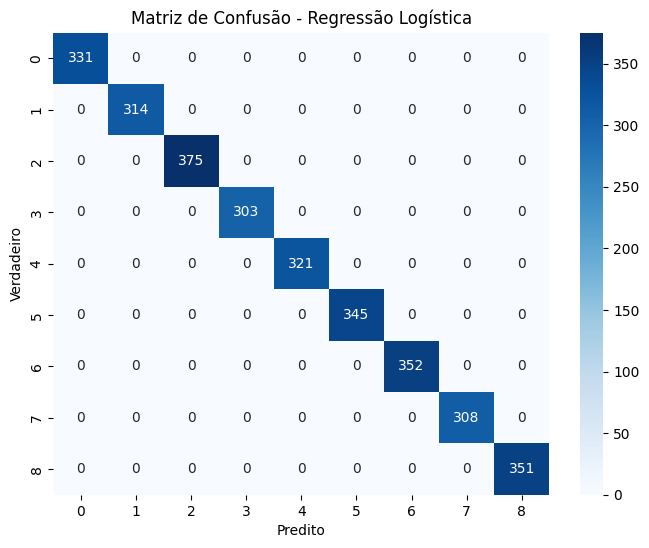

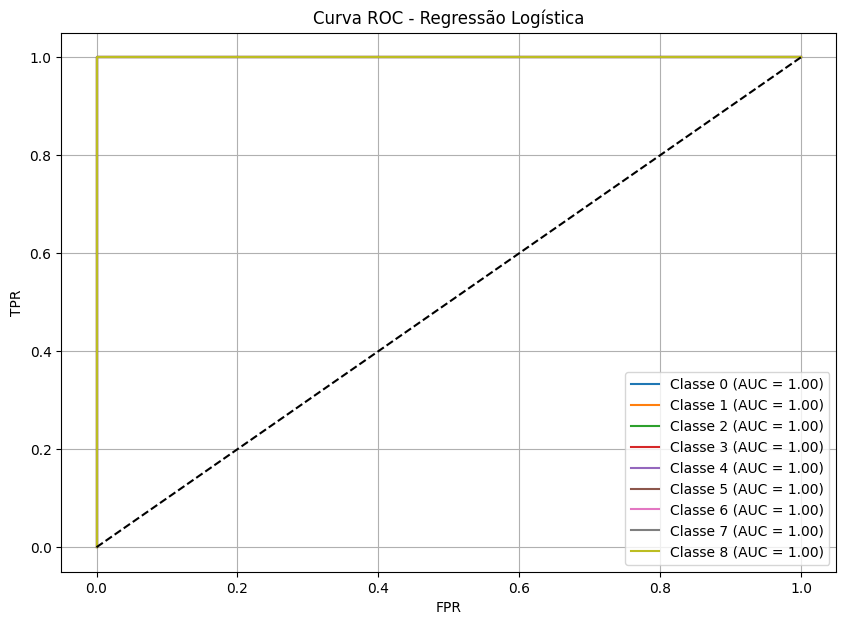

In [21]:
# Instanciar e treinar o modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Avaliando desempenho do modelo
evaluate_model(model, X_test, y_test, titulo='Regressão Logística')

### Random Forest

Acurácia: 1.0000

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       314
           2       1.00      1.00      1.00       375
           3       1.00      1.00      1.00       303
           4       1.00      1.00      1.00       321
           5       1.00      1.00      1.00       345
           6       1.00      1.00      1.00       352
           7       1.00      1.00      1.00       308
           8       1.00      1.00      1.00       351

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



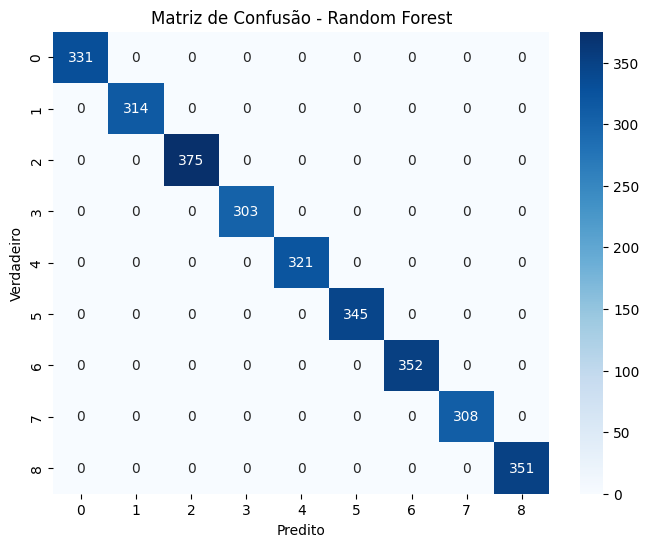

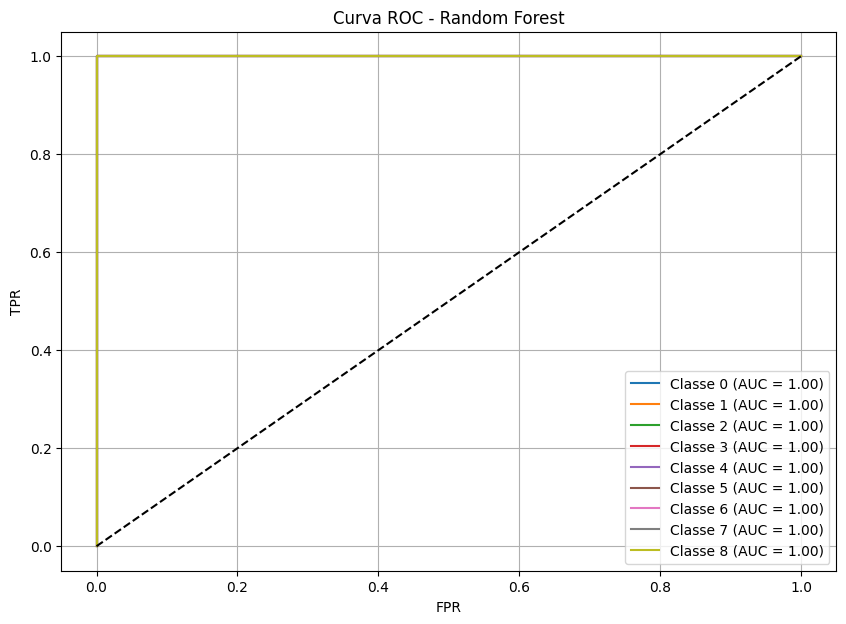

In [22]:
# Treinamento do modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Avaliando desempenho do modelo
evaluate_model(rf_model, X_test, y_test, titulo='Random Forest')

### K-Nearest Neighbors

Acurácia: 1.0000

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       314
           2       1.00      1.00      1.00       375
           3       1.00      1.00      1.00       303
           4       1.00      1.00      1.00       321
           5       1.00      1.00      1.00       345
           6       1.00      1.00      1.00       352
           7       1.00      1.00      1.00       308
           8       1.00      1.00      1.00       351

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



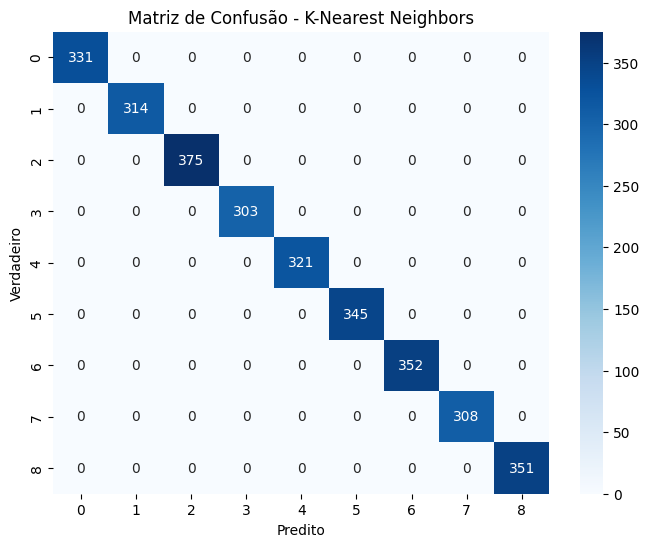

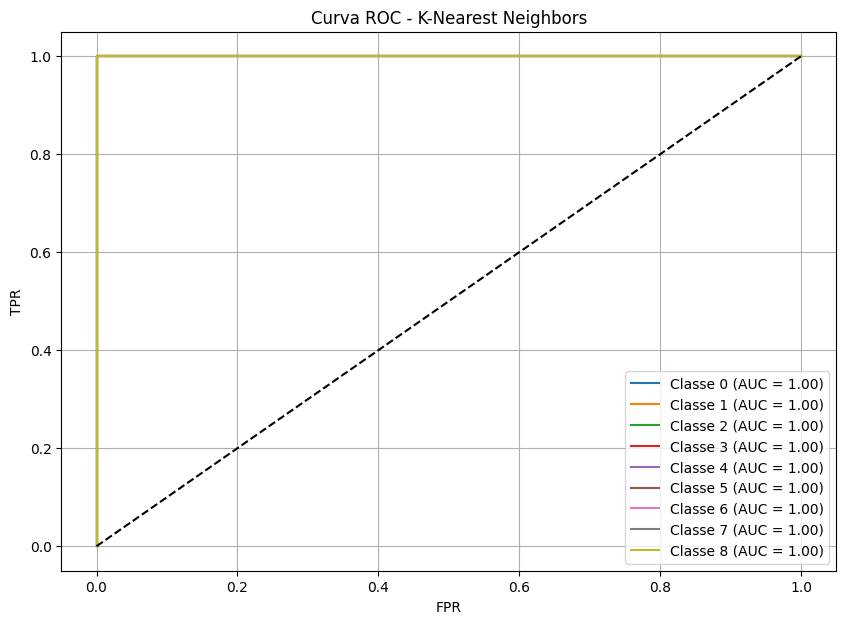

In [23]:
# Criar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Treinar o modelo
knn.fit(X_train, y_train)

# Avaliando desempenho do modelo
evaluate_model(knn, X_test, y_test, titulo='K-Nearest Neighbors')

### Support Vector Machines

Acurácia: 1.0000

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       314
           2       1.00      1.00      1.00       375
           3       1.00      1.00      1.00       303
           4       1.00      1.00      1.00       321
           5       1.00      1.00      1.00       345
           6       1.00      1.00      1.00       352
           7       1.00      1.00      1.00       308
           8       1.00      1.00      1.00       351

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



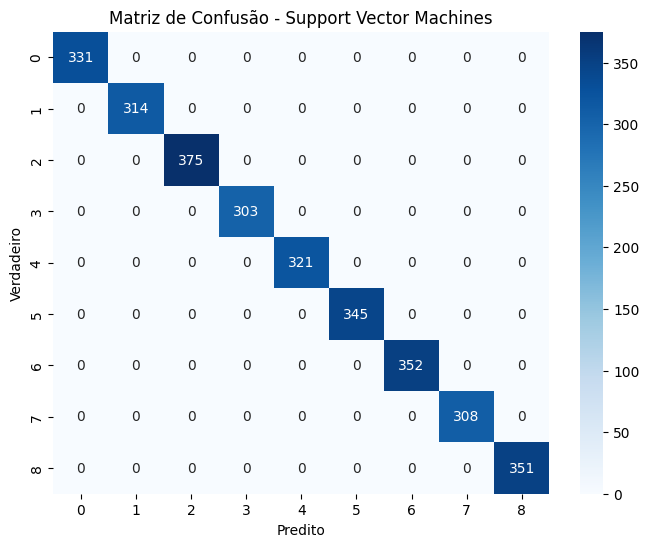

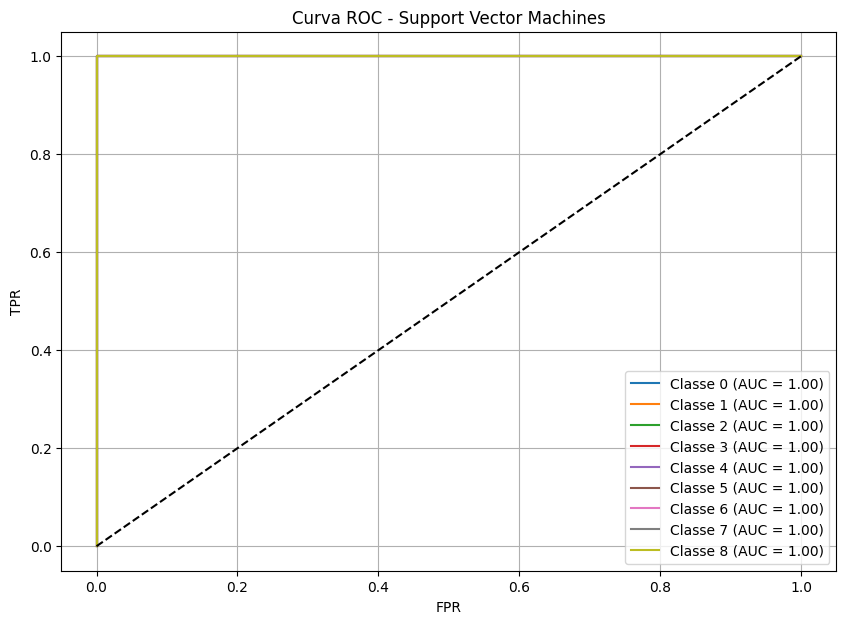

In [24]:
# Inicializando o modelo SVM
svm_model = SVC(kernel='linear')  # Usando um kernel linear

# Treinando o modelo com os dados
svm_model.fit(X_train, y_train)

# Avaliando desempenho do modelo
evaluate_model(svm_model, X_test, y_test, titulo='Support Vector Machines')

## ✅ Síntese dos Resultados dos Modelos de Classificação

Após o treinamento e avaliação dos quatro modelos selecionados para o classificador de perguntas, todos apresentaram desempenho **perfeito** nos dados de teste. Abaixo segue uma síntese dos resultados:

---

### 📈 Modelos Avaliados

- 🔹 **Regressão Logística**
- 🌲 **Random Forest**
- 🧭 **K-Nearest Neighbors (KNN)**
- ✴️ **Support Vector Machine (SVM)**

---

### 📊 Métricas Globais

| Métrica         | Valor   |
|-----------------|---------|
| 🎯 Acurácia     | 1.00    |
| 🧠 Precision    | 1.00    |
| 🔍 Recall       | 1.00    |
| ⚖️ F1-Score     | 1.00    |
| 🧪 AUC (ROC)    | 1.00    |

Todos os modelos atingiram **100%** em todas as métricas, inclusive com curvas ROC perfeitamente alinhadas, indicando que o separador aprendido foi capaz de distinguir todas as classes com total eficácia no conjunto de teste.

---


---

### 🧠 Interpretação

📌 Embora os resultados sejam excelentes, é importante destacar que os dados utilizados foram **sintéticos** e gerados com baixa ambiguidade linguística. Isso facilitou a separação entre as classes pelos modelos.

⚠️ Em um cenário real, espera-se que os modelos encontrem desafios como:

- Variação semântica (mesmo significado com frases diferentes)
- Ambiguidade linguística
- Erros ortográficos e gramaticais
- Categorias mais próximas semanticamente

---

### 🚀 Próximos Passos

- Criar um **crawller** para coletar dados reais de perguntas e respostas de sites confiáveis.
- Implementar a **API com FastAPI** para consumo do modelo.
- Empacotar com **Docker**.
- Avaliar a performance do modelo com dados mais ruidosos e realistas.

---

📂 Este projeto será incluído no portfólio como um exemplo de aplicação de algoritmos tradicionais de machine learning para problemas de NLP de baixa complexidade com alto desempenho.



## 🔍 Considerações Finais

- O projeto cumpriu com sucesso o objetivo de aplicar modelos clássicos de ML para construção de um classificador de perguntas.
- Apesar dos resultados perfeitos, é importante destacar o uso de dados sintéticos e que, em um cenário real, a acurácia tende a ser menor devido à complexidade da linguagem natural.
- Como próximos passos, será estudada a possibilidade de construir um **web crawler** para coletar dados reais de sites de perguntas frequentes e tornar o problema mais desafiador e realista.
- O modelo construído servirá de base para o desenvolvimento de uma **API com FastAPI**, empacotamento com **Docker**, e futura implantação na **AWS**.

---

## 📁 Tecnologias Utilizadas

- Python 3.9
- Scikit-learn
- Pandas / NumPy
- Matplotlib / Seaborn
- FastAPI (em etapas futuras)
- Docker (em etapas futuras)
